# 데이터 전처리

## 0.환경준비

### (1) Import

In [1]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### (2) Data Loading

In [2]:
# titanic
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv'
titanic = pd.read_csv(path, usecols = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked'])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [3]:
# airquality
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv'
air = pd.read_csv(path)
air['Date'] = pd.to_datetime(air['Date'])
air['Month'] = air['Date'].dt.month
air['WeekDay'] = air['Date'].dt.day_name()
air.head()

,Ozone,Solar.R,Wind,Temp,Date,Month,WeekDay
0,41,190.0,7.4,67,1973-05-01,5,Tuesday
1,36,118.0,8.0,72,1973-05-02,5,Wednesday
2,12,149.0,12.6,74,1973-05-03,5,Thursday
3,18,313.0,11.5,62,1973-05-04,5,Friday
4,19,NaN,14.3,56,1973-05-05,5,Saturday


## 1.전처리

### (1) 데이터 분할

* x, y 분할하기

데이터를 X와 y로 나누기
> * X : features, input, 조작변수, 요인, (독립변수)
* y : target, output, 결과변수, label, (종속변수) 

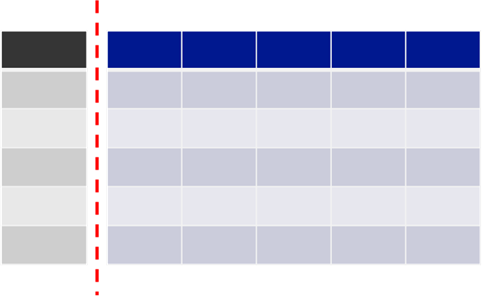

In [4]:
target = 'Survived'
x = titanic.drop(target, axis = 1)
y = titanic.loc[:, target]

* train, validation, test 분할은 머신러닝 과정에서 다룹니다.

<p color='red'>연습문제</p>

* (1) air 데이터프레임에서 y 는 Ozone 입니다. x, y로 분할해 봅시다.
    * 단, x, y의 이름은 x_air, y_air 로 지정합니다.

In [5]:
target = 'Ozone'
x_air = air.drop(target, axis = 1)
y_air = air.loc[:, target] # air[target]

In [6]:
x_air.head()

,Solar.R,Wind,Temp,Date,Month,WeekDay
0,190.0,7.4,67,1973-05-01,5,Tuesday
1,118.0,8.0,72,1973-05-02,5,Wednesday
2,149.0,12.6,74,1973-05-03,5,Thursday
3,313.0,11.5,62,1973-05-04,5,Friday
4,NaN,14.3,56,1973-05-05,5,Saturday


### (2) NaN 조치

**What & Why**
> NaN : 빈값, 사용할 수 없는 값. Not a Number  
모델링을 위해서 모든 데이터는 숫자여야 한다.  
그러므로 NaN에 대해서 어떤 식으로든 조치를 해야 한다.

**How**  
(1) 삭제
> 1) 행 : NaN가 적고, 운영에서 다시 발생되지 않거나, 운영에서 발생된 NaN을 대상에서 제외해도 괜찮을 때.    
2) 열 : 중요하지 않은(불필요한)변수, NaN이 너무 많을때.  

(2) 채우기
> 1) 공통 : 특정 값(평균, 최빈값, 상수 등)으로 채우기(SimpleImputer), 추정해서 채우기(KNNImputer), 비즈니스 관점에서 채우기    
2) 시계열 : 이전값(ffill), 이후값(bfill), 사이값으로 채우기(interpolate)  

#### ① 결측치 확인

* df.isna() : 각 셀에 데이터가 있으면 False, NA이면 True
* df.isnull()과 동일
* df.isna().sum() : True는 숫자로 변환되면 1이 됩니다. 이를 칼럼별로 합치라는 의미.

In [7]:
x.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

* sns.heatmap을 이용해서 시각화 할 수 있습니다.

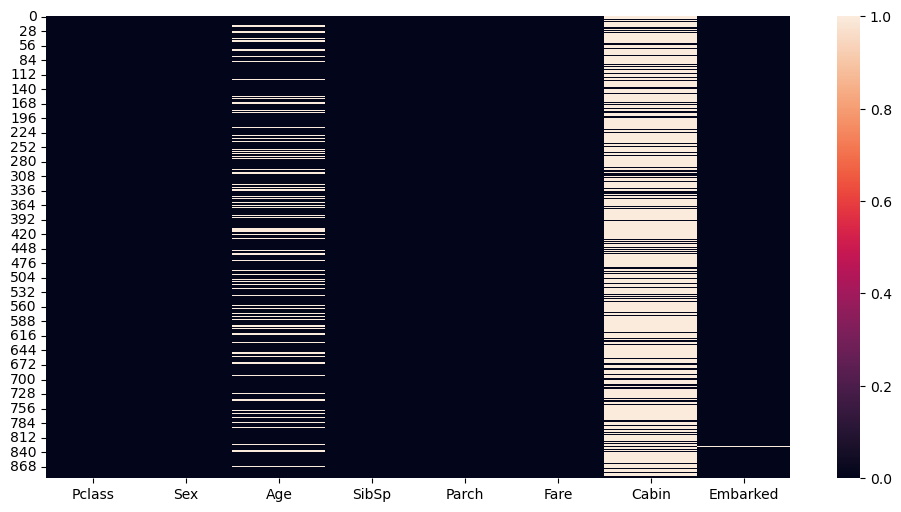

In [8]:
plt.figure(figsize = (12,6))    # 그림의 크기 조정
sns.heatmap(x.isna())           # 시각화
plt.show()

#### ② 결측치 제거

In [9]:
# 데이터프레임을 복사
temp = x.copy()

In [10]:
# df의 행과 열 구조 살피기
temp.shape

(891, 8)

* 행 제거

In [11]:
# axis = 0 행 제거. 
# inplace = True : 제거를 진짜 수행.(만약 False라면, 제거한 것처럼 조회)
temp.dropna(axis = 0, inplace = True)
temp.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [12]:
temp.shape

(183, 8)

* 열 제거

In [13]:
# 다시 temp로 데이터를 복사합니다.
temp = x.copy()

In [14]:
# 이번에는 NA 열을 삭제해 보겠습니다.
temp.dropna(axis = 1, inplace = True)
temp.isna().sum()

Pclass    0
Sex       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [15]:
# 특정 열 만을 삭제하려면, .drop
temp = x.copy()

temp.drop('Cabin', axis = 1, inplace = True)
temp.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<img width="25" alt="star1" src="https://user-images.githubusercontent.com/78655692/151471925-e5f35751-d4b9-416b-b41d-a059267a09e3.png"> <span style="color:green; font-size:150%"><b>연습문제</b></span>


* (1) x_air에 대해 NaN을 조사하고 시각화 해 봅시다.

* (2) x_air을 temp로 복사하고, NaN 행을 제거하시오.

* (3) x_air을 temp로 복사하고, NaN이 있는 열을 제거하시오.

* (4) x의 Solar.R은 NaN이 너무 많습니다. x에서 Solar.R을 직접 제거하세요.

#### ③ 결측치 채우기

* .fillna 를 이용하여 NA에 대해서 값을 채워 보겠습니다.
    * 단일값 : .fillna(0)
    * 이전 값, 이후 값 : .fillna(method = 'ffill'),  method = 'bfill'

* 단일값으로 채우기1 : 평균값으로 채우기

In [24]:
temp = x.copy()

In [25]:
# Age 평균값으로 채우기
mAge = temp['Age'].mean()
mAge

29.69911764705882

In [26]:
temp['Age'].fillna(mAge, inplace = True)

In [27]:
temp.isna().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

* 단일값으로 채우기2 : 최빈값으로 채우기

In [28]:
# Age 평균값으로 채우기
modeEmb = temp['Embarked'].mode()
modeEmb

0    S
Name: Embarked, dtype: object

mode는 최빈값을 구해 줍니다. 그러나 값의 형태가 시리즈 입니다.  
그래서 바로 적용하면 안되고 값을 조회하도록 인덱스 0을 지정해야 합니다.

In [29]:
# type 함수로 modeEmb의 타입을 확인합니다.
type(modeEmb)

pandas.core.series.Series

In [30]:
# 시리즈에서 값을 뽑기 위해 인덱스를 사용합시다. 
modeEmb[0]

'S'

In [31]:
# 이제 최빈값으로 NaN을 채웁니다.
temp['Embarked'].fillna(modeEmb[0], inplace = True)

In [32]:
temp.isna().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

* 이전값, 이후값으로 채우기

In [33]:
temp = x_air.copy()

In [34]:
# 이전 값으로 채우기
temp.fillna(method = 'ffill').head(7)

,Solar.R,Wind,Temp,Date,Month,WeekDay
0,190.0,7.4,67,1973-05-01,5,Tuesday
1,118.0,8.0,72,1973-05-02,5,Wednesday
2,149.0,12.6,74,1973-05-03,5,Thursday
3,313.0,11.5,62,1973-05-04,5,Friday
4,313.0,14.3,56,1973-05-05,5,Saturday
5,313.0,14.9,66,1973-05-06,5,Sunday
6,299.0,8.6,65,1973-05-07,5,Monday


<img width="25" alt="star1" src="https://user-images.githubusercontent.com/78655692/151471925-e5f35751-d4b9-416b-b41d-a059267a09e3.png"> <span style="color:green; font-size:150%"><b>연습문제</b></span>


* (1) x의 Age에 대해 최대값으로 직접 채워 봅시다.

* (2) x의 Embarked에 대해 'S'로 채워 봅시다.

* (3) x_air을 temp로 복사하고, Solar.R에 대해서 이후 값으로 채워 봅시다.

* (4)  x_air의 Solar.R에 대해서 직접 전,후 사이값으로 채우기 
    * .interpolate(method = 'linear')

### (3) 가변수화

**What & Why**

> * 모델링을 위한 데이터는 모두 숫자여야 한다.   
==> 모델이란 X와 y데이터로 부터 패턴(관계)을 찾아 수학적으로 정리해 놓은 것
* 그러므로 범주를 숫자로 변환해야 한다.
* 가변수화는 범주를 숫자로 변환하는 방법이다.
* 다만, 범주 중 이미 숫자로 변환된 경우 제외(예, 흡연여부 1:흡연, 0:비흡연)

**How**
> 

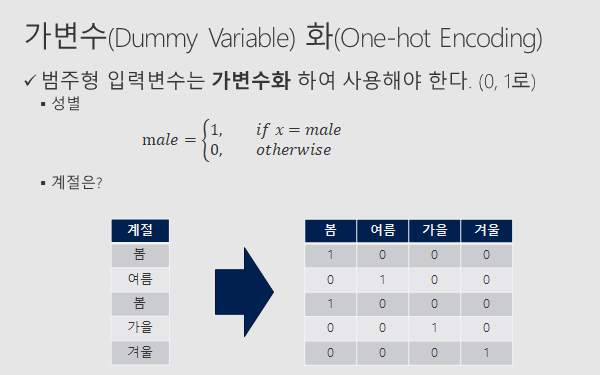

* 모델링을 위해서 모든 데이터 값은 숫자 여야 합니다.
* 숫자 형식이 아니라 의미상 숫자
    * 타이타닉 데이터의 pclass(객실등급)가 1,2,3 입니다. 이는 숫자 형식이지만 숫자의 의미는 아닙니다. (3등급 객실의 3이 1등급 객실의 1에 3배의 의미는 아니라는 말입니다.)
* 그러므로 모든 범주형 변수는 모두 (이미 0,1로 되어 있는 변수를 빼고) 가변수화를 수행해야 합니다.

In [46]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [47]:
col_dumm = ['Pclass', 'Sex', 'Embarked']
x = pd.get_dummies(x, columns = col_dumm, drop_first = True)
x.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,1


* drop_first = True : 가변수화 시, 첫번째 범주 열은 삭제. ==> 하나를 빼도 모든 범주 표현 가능.

<img width="25" alt="star1" src="https://user-images.githubusercontent.com/78655692/151471925-e5f35751-d4b9-416b-b41d-a059267a09e3.png"> <span style="color:green; font-size:150%"><b>연습문제</b></span>


* (1) x_air에 대해 범주형 변수를 찾아 직접 가변수화를 수행해 봅시다.

### (4) 스케일링

**What & Why**
> * 변수 값의 범위가 다르기 때문에 더 중요하게 여겨지는 것을 방지하기 위해 
* 모든 값의 범위를 맞춰 주기
* knn 알고리즘으로 모델링 하기 전에 반드시 필요.
(k-means, DL)


**How**
> 방법 1 : Normalization (MinMax방식)
* 모든 변수의 범위를 0 ~ 1로 변환 
* 입력변수 X가 [a, b] 범위라면(a=min, b=max)

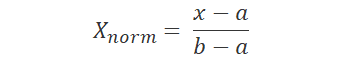

> 방법2 : Standardization 
* 모든 변수의 평균 = 0, 표준편차=1로 변환

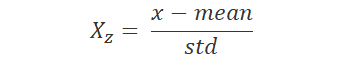

In [50]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

* 정규화(Normalization, MinMax 방식)
    * 모든 값을 0 ~ 1 로.

In [51]:
# 선언하기
scaler = MinMaxScaler()

# 만들고 적용 .fit_transform()   : .fit() + .transform()
x1 = scaler.fit_transform(x)
# 적용하고 나면 넘파이 어레이가 된다.

# 모델링할 때에는 넘파이 어레이여도 상관 없지만, 우리가 편하게 살펴보기 위해 데이터프레임으로 변환합니다.
x1 = pd.DataFrame(x1, columns = list(x))
x1.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.271174,0.125,0.0,0.014151,0.0,1.0,1.0,0.0,1.0
1,0.472229,0.125,0.0,0.139136,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.000,0.0,0.015469,0.0,1.0,0.0,0.0,1.0
3,0.434531,0.125,0.0,0.103644,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.000,0.0,0.015713,0.0,1.0,1.0,0.0,1.0


* 표준화(Standardization)
    * 평균은 0, 표준편차 1 로

In [52]:
# 선언하기
scaler = StandardScaler()

# 만들고 적용 .fit_transform()   : .fit() + .transform()
x2 = scaler.fit_transform(x)
# 적용하고 나면 넘파이 어레이가 된다.

# 모델링할 때에는 넘파이 어레이여도 상관 없지만, 우리가 편하게 살펴보기 위해 데이터프레임으로 변환합니다.
x2 = pd.DataFrame(x2, columns = list(x))
x2.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,-0.530377,0.432793,-0.473674,-0.502445,-0.510152,0.902587,0.737695,-0.307562,0.619306
1,0.571831,0.432793,-0.473674,0.786845,-0.510152,-1.107926,-1.355574,-0.307562,-1.614710
2,-0.254825,-0.474545,-0.473674,-0.488854,-0.510152,0.902587,-1.355574,-0.307562,0.619306
3,0.365167,0.432793,-0.473674,0.420730,-0.510152,-1.107926,-1.355574,-0.307562,0.619306
4,0.365167,-0.474545,-0.473674,-0.486337,-0.510152,0.902587,0.737695,-0.307562,0.619306


* 값들을 살펴봅시다.

In [53]:
x.describe()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.206510,0.551066,0.647587,0.086420,0.722783
std,14.526497,1.102743,0.806057,49.693429,0.405028,0.497665,0.477990,0.281141,0.447876
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000,0.000000,1.000000
75%,38.000000,1.000000,0.000000,31.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
x1.describe()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.367921,0.065376,0.063599,0.062858,0.206510,0.551066,0.647587,0.086420,0.722783
std,0.182540,0.137843,0.134343,0.096995,0.405028,0.497665,0.477990,0.281141,0.447876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.247612,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.346569,0.000000,0.000000,0.028213,0.000000,1.000000,1.000000,0.000000,1.000000
75%,0.472229,0.125000,0.000000,0.060508,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
x2.describe()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
count,7.140000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,8.910000e+02
mean,2.388379e-16,4.386066e-17,5.382900e-17,3.987333e-18,1.993666e-17,-6.778466e-17,-1.156327e-16,0.000000,-4.984166e-17
std,1.000701e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562,1.000562e+00
min,-2.016979e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,-5.101515e-01,-1.107926e+00,-1.355574e+00,-0.307562,-1.614710e+00
25%,-6.595416e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,-5.101515e-01,-1.107926e+00,-1.355574e+00,-0.307562,-1.614710e+00
50%,-1.170488e-01,-4.745452e-01,-4.736736e-01,-3.573909e-01,-5.101515e-01,9.025874e-01,7.376951e-01,-0.307562,6.193064e-01
75%,5.718310e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,-5.101515e-01,9.025874e-01,7.376951e-01,-0.307562,6.193064e-01
max,3.465126e+00,6.784163e+00,6.974147e+00,9.667167e+00,1.960202e+00,9.025874e-01,7.376951e-01,3.251373,6.193064e-01


<img width="25" alt="star1" src="https://user-images.githubusercontent.com/78655692/151471925-e5f35751-d4b9-416b-b41d-a059267a09e3.png"> <span style="color:green; font-size:150%"><b>연습문제</b></span>


* (1) x_air의 Date 열을 삭제합니다.

* (2) x_air을 표준화 방식으로 스케일링 하시오.

-----